In [50]:
#Import all required libraries as below

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [51]:
#import Skyserver data files using pandas

df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/Skyserver.csv")

In [52]:
#Checking not null values & data types for all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
 17  Class      10000 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [53]:
#distribution of categorical feature
df.describe(include=['O'])

,Class
count,10000
unique,3
top,GALAXY
freq,4998


In this dataset target value 'class' have 3 unique values & seems all 3 are used repeatetivly ; GALAXY target value is 50% (highest) ; Other columns dont have any duplicate value.

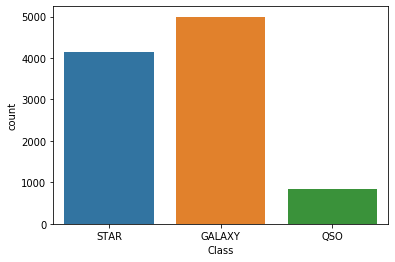

In [54]:
# Analysis of target value 'class' using plot to visualise % of  
sns.countplot(x='Class', data=df);

Its shows GALAXY class is highest & QSO is lowest

In [55]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.240000e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.644890e+18,0.143726,1460.986400,52943.533300,353.069400
std,2.122346e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013758e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.240000e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,3.000000e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.240000e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.390000e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.240000e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.970000e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.240000e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.880000e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.240000e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.470000e+18,5.353854,8410.000000,57481.000000,1000.000000


In [56]:
df.head(2)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,Class
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,-0.000009,3306,54922,491,STAR
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,-0.000055,323,51615,541,STAR


In [57]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['objid','ra','dec','u','g','r','i','z','run','rerun','camcol','field','specobjid','redshift','plate','mjd','fiberid','Class']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [58]:
# Checking datatypes after using label encoder for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   objid      10000 non-null  int64
 1   ra         10000 non-null  int64
 2   dec        10000 non-null  int64
 3   u          10000 non-null  int64
 4   g          10000 non-null  int64
 5   r          10000 non-null  int64
 6   i          10000 non-null  int64
 7   z          10000 non-null  int64
 8   run        10000 non-null  int64
 9   rerun      10000 non-null  int64
 10  camcol     10000 non-null  int64
 11  field      10000 non-null  int64
 12  specobjid  10000 non-null  int64
 13  redshift   10000 non-null  int64
 14  plate      10000 non-null  int64
 15  mjd        10000 non-null  int64
 16  fiberid    10000 non-null  int64
 17  Class      10000 non-null  int32
dtypes: int32(1), int64(17)
memory usage: 1.3 MB


In [59]:
df.head(2)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,Class
0,0,5378,4030,8818,3143,1853,1594,1474,3,0,3,256,254,1681,267,182,490,2
1,0,5392,4145,4066,3722,4220,4703,4956,3,0,3,256,53,1437,49,6,540,2


# EDA - Analyse the data set stats using plots

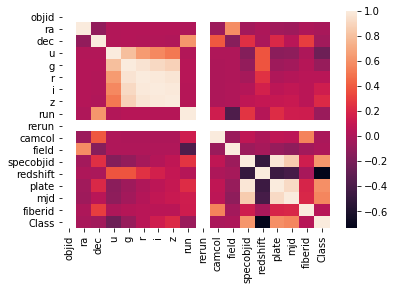

In [60]:
# checking correlation using heatmap
dfcor=df.corr()
sns.heatmap(dfcor)

As per above correlation map given values are correlated & impacting the target ; correlated valuaes -> u,g,r,i,z,rerun,specobjid,plate,mjd

In [61]:
# class distribution of target 
print(df.groupby('Class').size())

Class
0    4998
1     850
2    4152
dtype: int64


In [62]:
# Checking for skewness for each of the column
df.skew()

objid        0.000000
ra           0.000000
dec          0.000000
u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.978221
rerun        0.000000
camcol      -0.100220
field        0.229204
specobjid    0.247032
redshift     0.068622
plate        0.888700
mjd          1.177842
fiberid      0.150256
Class        0.169292
dtype: float64

In [63]:
# Check for the outliers,apply zscore & remove skewness

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(10000, 18)
(0, 18)


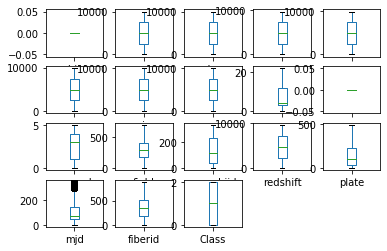

In [64]:
# Visualization - box and whisker plots
df.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.show()

Its shows outliers not available in any columns

In [65]:
import pandas as pd
X = df[['u','g','r','i','z','rerun','specobjid','plate','mjd']]
y = df.Class        # y is a vector, hence we use dot to access 'label'

In [66]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(10000, 9)


In [67]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(10000,)


In [68]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [69]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.858


In [78]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [72]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.898800 (0.007092)
LDA: 0.882800 (0.011226)
KNN: 0.931467 (0.010017)
CART: 0.916533 (0.012596)
NB: 0.734267 (0.012928)
SVM: 0.501200 (0.000400)


In [73]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [74]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]
# scoring =[r2,neg_mean_squared_error,explained_variance]

sv=SVC()
score=cross_val_score(sv,X,y,cv=10,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=10)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.948 0.919 0.929 0.923 0.935 0.928 0.921 0.92  0.93  0.933]
mean scores <built-in method mean of numpy.ndarray object at 0x000001DFD171BA30>
std 0.008333066662399845
Y prediction values
[2 2 0 ... 2 0 0]


0.9286

In [75]:
# Decision Tree Classifier (criterion='gini')
# Decision Tree Classifier (criterion='entropy')
# gini and entropy

dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,X,y,cv=5,scoring='f1_macro')

print('f1_score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(dtc, X, y, cv=5)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

f1_score: [0.88350421 0.88713984 0.89236014 0.88300924 0.90027584]
mean score: 0.8892578529520477
stn deviation: 0.006444467321935978
Y prediction values
[2 2 0 ... 2 0 0]


array([[4673,   65,  260],
       [  73,  697,   80],
       [ 313,   86, 3753]], dtype=int64)

In [76]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=5,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=5)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

accuracy score: [0.94   0.9285 0.9335 0.9275 0.9415]
mean score: 0.9341999999999999
stn deviation: 0.005741080037762923
Y prediction values
[2 2 0 ... 2 0 0]
y_pred.shape (10000,)


array([[4663,   36,  299],
       [  57,  757,   36],
       [ 159,   71, 3922]], dtype=int64)

In [77]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file

score=cross_val_score(knn,X,y,cv=5,scoring='accuracy')

print(score)

[0.94   0.9285 0.9335 0.9275 0.9415]


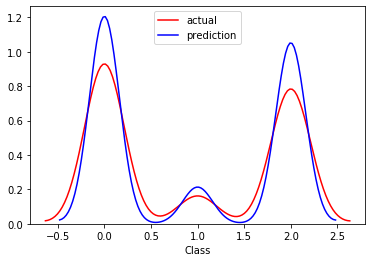

In [79]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-KNN model gives best score for this model ,its 93% & Test score is 94%.

Its shows GALAXY class is highest & QSO is lowest.